In [1]:
# Import necessary libraries
import pandas as pd # pandas is used for data manipulation and analysis (working with DataFrames)
import numpy as np # numpy is used for numerical operations, especially with arrays
from sklearn.model_selection import train_test_split # train_test_split is for splitting data into training and testing sets
from sklearn.ensemble import RandomForestClassifier # RandomForestClassifier is the machine learning model we will use
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer # LabelEncoder and MultiLabelBinarizer are for encoding categorical features
from sklearn.metrics import accuracy_score, classification_report # These are metrics to evaluate the model's performance
import re # re is used for regular expressions, useful for pattern matching in text (like skills)
from io import StringIO # StringIO is used to work with string data as if it were a file (not directly used in the final code, but good to keep if needed for text processing)


# Load the dataset
csv_url = "/content/btech_students_career_dataset.csv" # Define the path to the dataset file
df = pd.read_csv(csv_url) # Read the CSV file into a pandas DataFrame named 'df'

In [2]:
# Initial Data Exploration

# Print a header for this section
print("--- Initial Data Exploration ---")

# Print a sub-header for the DataFrame head
print("\nDataFrame Head:")
print(df.head()) # Display the first 5 rows of the DataFrame to get a glimpse of the data


--- Initial Data Exploration ---

DataFrame Head:
  Student_ID  Age  Gender Specialization  Year_of_Study   GPA  \
0    S000001   20  Female             CE              4  6.89   
1    S000002   22    Male          AI/ML              3  8.56   
2    S000003   22    Male             CE              1  7.43   
3    S000004   25    Male          AI/ML              2  7.35   
4    S000005   24  Female            ECE              1  9.46   

                                          Key_Skills  Aptitude_Score  \
0        Machine Learning,Communication,Data Science               2   
1                                   C++,Cloud,Python               5   
2      DevOps,NoSQL,Java,Cybersecurity,Deep Learning               5   
3  Cybersecurity,Python,Networking,Cloud,Deep Lea...              10   
4  Data Science,Communication,DBMS,Java,Networkin...               7   

   Communication_Score  Internship_Experience  Project_Experience  \
0                    5                      1            

In [3]:
print("\nDataFrame Shape:")
print(df.shape)


DataFrame Shape:
(100000, 18)


In [4]:
print("\nDataFrame Info:")
df.info()


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Student_ID                         100000 non-null  object 
 1   Age                                100000 non-null  int64  
 2   Gender                             100000 non-null  object 
 3   Specialization                     100000 non-null  object 
 4   Year_of_Study                      100000 non-null  int64  
 5   GPA                                100000 non-null  float64
 6   Key_Skills                         100000 non-null  object 
 7   Aptitude_Score                     100000 non-null  int64  
 8   Communication_Score                100000 non-null  int64  
 9   Internship_Experience              100000 non-null  int64  
 10  Project_Experience                 100000 non-null  int64  
 11  Role_Preference        

In [5]:
print("\nDataFrame Description:")
print(df.describe(include='all'))


DataFrame Description:
       Student_ID            Age  Gender Specialization  Year_of_Study  \
count      100000  100000.000000  100000         100000  100000.000000   
unique     100000            NaN       3              8            NaN   
top       S099984            NaN    Male            ECE            NaN   
freq            1            NaN   59945          12691            NaN   
mean          NaN      22.497670     NaN            NaN       2.495670   
std           NaN       1.710276     NaN            NaN       1.120702   
min           NaN      20.000000     NaN            NaN       1.000000   
25%           NaN      21.000000     NaN            NaN       1.000000   
50%           NaN      22.000000     NaN            NaN       2.000000   
75%           NaN      24.000000     NaN            NaN       4.000000   
max           NaN      25.000000     NaN            NaN       4.000000   

                  GPA                   Key_Skills  Aptitude_Score  \
count   100000.00

In [6]:
!pip install pdfminer.six

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 46.2 MB/s eta 0:00:00


In [7]:
# Improved Data Cleaning and Preprocessing
print("\n--- Data Cleaning and Preprocessing ---") # Print a header for this section

# Convert specific columns to numeric types, coercing errors to NaN (Not a Number)
# This is important for columns that should be numbers but might contain non-numeric data
df['GPA'] = pd.to_numeric(df['GPA'], errors='coerce') # Convert 'GPA' column to numeric
df['Job_Match_Score'] = pd.to_numeric(df['Job_Match_Score'], errors='coerce') # Convert 'Job_Match_Score' to numeric
df['Predicted_Job_Success'] = pd.to_numeric(df['Predicted_Job_Success'], errors='coerce') # Convert 'Predicted_Job_Success' to numeric

# Convert other numeric-like columns, again coercing errors to NaN
df['Year_of_Study'] = pd.to_numeric(df['Year_of_Study'], errors='coerce') # Convert 'Year_of_Study' to numeric
df['Aptitude_Score'] = pd.to_numeric(df['Aptitude_Score'], errors='coerce') # Convert 'Aptitude_Score' to numeric
df['Communication_Score'] = pd.to_numeric(df['Communication_Score'], errors='coerce') # Convert 'Communication_Score' to numeric
df['Internship_Experience'] = pd.to_numeric(df['Internship_Experience'], errors='coerce') # Convert 'Internship_Experience' to numeric
df['Project_Experience'] = pd.to_numeric(df['Project_Experience'], errors='coerce') # Convert 'Project_Experience' to numeric

# Handle missing values (NaNs) in numerical columns
for col in ['GPA', 'Job_Match_Score', 'Predicted_Job_Success', 'Year_of_Study',
            'Aptitude_Score', 'Communication_Score', 'Internship_Experience', 'Project_Experience']:
    if df[col].dtype == 'float64' or df[col].dtype == 'int64': # Check if the column is of numeric type
        df[col] = df[col].fillna(df[col].median()) # Fill missing numerical values with the median of the column

# Handle missing values in categorical columns
for col in ['Gender', 'Specialization', 'Key_Skills', 'Role_Preference',
            'Recommended_Career_Path', 'Skill_Gap', 'Suggested_Courses',
            'Employment_Status_Post_Graduation']:
    df[col] = df[col].fillna('Unknown') # Fill missing categorical values with the string 'Unknown'

# Encode categorical features using Label Encoding
# Label Encoding converts each unique category value into a numerical label
le_gender = LabelEncoder() # Initialize a LabelEncoder for 'Gender'
df['Gender_Encoded'] = le_gender.fit_transform(df['Gender']) # Fit and transform the 'Gender' column, creating a new 'Gender_Encoded' column

le_specialization = LabelEncoder() # Initialize a LabelEncoder for 'Specialization'
df['Specialization_Encoded'] = le_specialization.fit_transform(df['Specialization']) # Fit and transform 'Specialization'

le_role_preference = LabelEncoder() # Initialize a LabelEncoder for 'Role_Preference'
df['Role_Preference_Encoded'] = le_role_preference.fit_transform(df['Role_Preference']) # Fit and transform 'Role_Preference'

# IMPROVED SKILL NORMALIZATION FUNCTION
def normalize_skill(skill):
    """
    Improved skill normalization that handles more variations and synonyms
    This function takes a skill string and returns a standardized version.
    """
    if not skill or pd.isna(skill): # Check if the skill is empty or NaN
        return "" # Return an empty string if the skill is invalid

    skill = str(skill).strip().lower() # Convert the skill to a string, remove leading/trailing whitespace, and convert to lowercase

    # Remove common prefixes/suffixes using regular expressions
    skill = re.sub(r'\\b(technologies?|tools?|skills?|languages?|frameworks?)\\b', '', skill) # Remove words like 'technology', 'tool', 'skill', etc.
    skill = re.sub(r'[^a-z0-9\\s&+/]', '', skill)  # Remove characters that are not letters, numbers, whitespace, &, /, +, or - (keeps chars needed for C++, C#, .NET)
    skill = re.sub(r'\\s+', ' ', skill).strip() # Replace multiple spaces with a single space and remove leading/trailing spaces

    # Comprehensive skill mapping: defines a dictionary to map variations of skills to a single standardized name
    skill_mapping = {
        # Programming Languages mappings
        'js': 'javascript', 'nodejs': 'javascript', 'node.js': 'javascript',
        'reactjs': 'javascript', 'react.js': 'javascript',
        'angularjs': 'javascript', 'angular.js': 'javascript',
        'vuejs': 'javascript', 'vue.js': 'javascript',
        'expressjs': 'javascript', 'express.js': 'javascript',
        'typescript': 'javascript', 'ts': 'javascript',
        'py': 'python', 'django': 'python', 'flask': 'python',
        'cpp': 'c++', 'cplusplus': 'c++',
        'csharp': 'c#', 'dotnet': 'c#', '.net': 'c#',
        'go': 'golang', 'golanglang': 'golang',

        # ML/AI mappings
        'ml': 'machine learning', 'ai': 'machine learning',
        'artificial intelligence': 'machine learning',
        'dl': 'deep learning', 'neural networks': 'deep learning',
        'nlp': 'natural language processing',
        'computer vision': 'machine learning', 'cv': 'machine learning',

        # Cloud/DevOps mappings
        'aws': 'cloud computing', 'amazon web services': 'cloud computing',
        'azure': 'cloud computing', 'microsoft azure': 'cloud computing',
        'gcp': 'cloud computing', 'google cloud': 'cloud computing',
        'google cloud platform': 'cloud computing',
        'kubernetes': 'devops', 'k8s': 'devops', 'docker': 'devops',
        'jenkins': 'devops', 'ansible': 'devops', 'terraform': 'devops',
        'ci/cd': 'devops', 'continuous integration': 'devops',

        # Databases mappings
        'mysql': 'sql', 'postgresql': 'sql', 'postgres': 'sql',
        'sqlite': 'sql', 'oracle': 'sql', 'mssql': 'sql',
        'database management': 'sql', 'dbms': 'sql',
        'mongodb': 'nosql', 'cassandra': 'nosql', 'redis': 'nosql',

        # Web Development mappings
        'html5': 'html', 'css3': 'css', 'bootstrap': 'css',
        'rest': 'api', 'restful': 'api', 'graphql': 'api',
        'frontend': 'web development', 'front end': 'web development',
        'backend': 'web development', 'back end': 'web development',
        'fullstack': 'web development', 'full stack': 'web development',

        # Security mappings
        'infosec': 'cybersecurity', 'information security': 'cybersecurity',
        'network security': 'cybersecurity', 'cyber security': 'cybersecurity',
        'ethical hacking': 'cybersecurity', 'pen testing': 'cybersecurity',

        # Data mappings
        'data analytics': 'data analysis', 'data engineer': 'data analysis',
        'tableau': 'data visualization', 'power bi': 'data visualization',
        'excel': 'data analysis', 'statistics': 'data analysis',
        'big data': 'data analysis', 'data mining': 'data analysis',

        # Soft Skills mappings
        'communication skills': 'communication',
        'public speaking': 'communication', 'presentation': 'communication',
        'interpersonal skills': 'communication', 'teamwork': 'communication',

        # Project Management mappings
        'agile methodology': 'project management', 'scrum master': 'project management',
        'pmp': 'project management', 'project planning': 'project management',

        # UI/UX mappings
        'user interface': 'ui/ux design', 'user experience': 'ui/ux design',
        'ux/ui': 'ui/ux design', 'figma': 'ui/ux design', 'sketch': 'ui/ux design',
        'adobe xd': 'ui/ux design', 'wireframe': 'ui/ux design',

        # Networking mappings
        'tcpip': 'networking', 'tcp/ip': 'networking', 'routing': 'networking',
        'switching': 'networking', 'cisco': 'networking',
    }

    # Check for exact matches first in the skill_mapping dictionary
    if skill in skill_mapping:
        return skill_mapping[skill] # Return the normalized skill if an exact match is found

    # Check for partial matches within the skill string
    for key, value in skill_mapping.items():
        if key in skill:
            return value # Return the normalized skill if a part of the skill string matches a key

    # Return the original skill if no mapping found
    return skill # If no normalization rule applies, return the original skill

# Process skills columns with improved normalization
# Apply the normalize_skill function to each skill in the comma-separated strings of the 'Key_Skills' column
df['Key_Skills_Processed'] = df['Key_Skills'].apply(
    lambda x: [normalize_skill(s) for s in str(x).split(',') if s.strip()] # Split the string by comma, normalize each skill, and filter out empty strings
)
# Apply normalization to 'Suggested_Courses', removing "Course on " prefix
df['Suggested_Courses_Processed'] = df['Suggested_Courses'].apply(
    lambda x: [normalize_skill(s.replace('Course on ', '')) for s in str(x).split(',') if s.strip()] # Similar process for Suggested_Courses
)
# Apply normalization to 'Skill_Gap'
df['Skill_Gap_Processed'] = df['Skill_Gap'].apply(
    lambda x: [normalize_skill(s) for s in str(x).split(',') if s.strip()] # Similar process for Skill_Gap
)

# Multi-label encoding for skills
# MultiLabelBinarizer is used to convert a list of skills for each entry into a binary matrix
mlb_skills = MultiLabelBinarizer() # Initialize a MultiLabelBinarizer
# Fit and transform the 'Key_Skills_Processed' column (list of lists of skills)
skills_encoded = mlb_skills.fit_transform(df['Key_Skills_Processed'])
# Create a new DataFrame from the encoded skills, using the unique skills as column names
skills_df = pd.DataFrame(skills_encoded, columns=mlb_skills.classes_)
# Concatenate the new skills DataFrame with the original DataFrame 'df'
df = pd.concat([df, skills_df], axis=1)


--- Data Cleaning and Preprocessing ---


In [8]:
# Improved Feature Engineering and Model Training with Hyperparameter Tuning
print("\n--- Feature Engineering and Model Training ---") # Print a header for this section

# Define the features (X) and the target variable (y)

# Numerical features identified from the dataset
numerical_features = ['Age', 'GPA', 'Year_of_Study', 'Aptitude_Score',
                     'Communication_Score', 'Internship_Experience',
                     'Project_Experience', 'Job_Match_Score', 'Predicted_Job_Success']
# Categorical features that have been encoded numerically
categorical_encoded_features = ['Gender_Encoded', 'Specialization_Encoded', 'Role_Preference_Encoded']
# Skill features created by the MultiLabelBinarizer (each unique skill is a feature)
skill_features = list(mlb_skills.classes_)

# Combine all selected features into the feature matrix X
X = df[numerical_features + categorical_encoded_features + skill_features]
# Define the target variable y as the 'Recommended_Career_Path' column
y = df['Recommended_Career_Path']

# Encode the target variable 'Recommended_Career_Path'
le_career_path = LabelEncoder() # Initialize a LabelEncoder for the target variable
y_encoded = le_career_path.fit_transform(y) # Fit and transform the target variable, converting career path names to numerical labels

# Split the data into training and testing sets
# X_train, y_train: data for training the model
# X_test, y_test: data for evaluating the model
# test_size=0.2 means 20% of the data will be used for testing
# random_state=42 ensures the split is the same every time the code is run
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train the model with hyperparameter tuning using GridSearchCV
# GridSearchCV helps find the best combination of hyperparameters for the model
from sklearn.model_selection import GridSearchCV # Import GridSearchCV

# Define a refined parameter grid for hyperparameter tuning
# This dictionary specifies the hyperparameters and the values to test for each
param_grid = {
    'n_estimators': [150, 250], # Number of trees in the random forest
    'max_depth': [15, 25], # Maximum depth of each tree
    'min_samples_leaf': [5, 10] # Minimum number of samples required to be at a leaf node
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), # The model to tune (Random Forest)
                           param_grid=param_grid, # The grid of hyperparameters to search
                           cv=3, # Number of cross-validation folds (data is split into 3 parts for validation)
                           n_jobs=-1, # Use all available CPU cores for faster computation
                           verbose=2) # Controls the verbosity: higher values print more details

# Fit the grid search to the training data
# This process trains the model with each combination of hyperparameters in the grid
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score found by GridSearchCV
print(f"\nBest parameters found: {grid_search.best_params_}") # Print the combination of parameters that yielded the best results
print(f"Best cross-validation accuracy: {grid_search.best_score_:.2f}") # Print the best accuracy score achieved during cross-validation

# Use the best model found by GridSearchCV to make predictions on the test set
best_model = grid_search.best_estimator_ # Get the best trained model from the grid search results
y_pred = best_model.predict(X_test) # Use the best model to predict career paths for the test data

# Evaluate the model's performance on the test set
print(f"\nModel Accuracy on Test Set: {accuracy_score(y_test, y_pred):.2f}") # Calculate and print the accuracy of the model on the test data

# IMPROVED JOB SKILLS MAPPING (without duplicates)
# This dictionary maps each job role to a list of required skills (normalized names)
job_skills_mapping = {
    'Cloud Engineer': ['cloud computing', 'devops', 'networking', 'linux', 'python', 'security'],
    'Web Developer': ['javascript', 'html', 'css', 'web development', 'api', 'database'],
    'Network Engineer': ['networking', 'linux', 'security'],
    'Database Administrator': ['sql', 'nosql', 'database', 'security'],
    'Cybersecurity Analyst': ['cybersecurity', 'networking', 'linux', 'security'],
    'Software Engineer': ['java', 'python', 'c++', 'data structures', 'algorithms', 'devops'],
    'AI Engineer': ['machine learning', 'python', 'data analysis', 'tensorflow', 'pytorch'],
    'Embedded Systems Engineer': ['c++', 'c', 'embedded systems', 'hardware'],
    'Business Analyst': ['business analysis', 'communication', 'sql', 'data analysis', 'project management'],
    'Data Analyst': ['data analysis', 'sql', 'python', 'data visualization'],
    'DevOps Engineer': ['devops', 'cloud computing', 'linux', 'automation'],
    'Mobile App Developer': ['java', 'kotlin', 'swift', 'mobile development', 'ui/ux design'],
    'UI/UX Designer': ['ui/ux design', 'user research', 'graphic design'],
    'Project Manager': ['project management', 'leadership', 'communication', 'risk management'],
    'Data Scientist': ['data analysis', 'machine learning', 'python', 'statistics']
}

# Print the list of top jobs and their required skills
print("\n--- Top 15 Jobs and Their Required Skills ---") # Header
for job, skills in job_skills_mapping.items(): # Iterate through each job and its skills in the dictionary
    print(f"Job: {job}") # Print the job name
    print(f"  Required Skills: {', '.join(skills)}") # Print the required skills, joined by commas
    print("-" * 40) # Print a separator line


--- Feature Engineering and Model Training ---
Fitting 3 folds for each of 8 candidates, totalling 24 fits


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



Best parameters found: {'max_depth': 15, 'min_samples_leaf': 10, 'n_estimators': 250}
Best cross-validation accuracy: 0.10

Model Accuracy on Test Set: 0.10

--- Top 15 Jobs and Their Required Skills ---
Job: Cloud Engineer
  Required Skills: cloud computing, devops, networking, linux, python, security
----------------------------------------
Job: Web Developer
  Required Skills: javascript, html, css, web development, api, database
----------------------------------------
Job: Network Engineer
  Required Skills: networking, linux, security
----------------------------------------
Job: Database Administrator
  Required Skills: sql, nosql, database, security
----------------------------------------
Job: Cybersecurity Analyst
  Required Skills: cybersecurity, networking, linux, security
----------------------------------------
Job: Software Engineer
  Required Skills: java, python, c++, data structures, algorithms, devops
----------------------------------------
Job: AI Engineer
  Requi

In [9]:
# IMPROVED Resume Skill Extraction (PDF)
print("\n--- Resume Skill Extraction (PDF) ---") # Print a header for this section

# Create a comprehensive skill vocabulary from the dataset and job mappings
all_dataset_skills = set() # Initialize an empty set to store unique skills
# Add all processed key skills from the dataset to the set
for skills_list in df['Key_Skills_Processed']:
    all_dataset_skills.update(skills_list)
# Add all processed skill gaps from the dataset to the set
for skills_list in df['Skill_Gap_Processed']:
    all_dataset_skills.update(skills_list)
# Add all skills from the job skills mapping to the set
for skills_list in job_skills_mapping.values():
    all_dataset_skills.update(skills_list)

# Add some common variations to the vocabulary for better matching
# This dictionary helps in recognizing different ways a skill might be written
additional_variations = {
    'machine learning': ['ml', 'ai', 'artificial intelligence'], # Variations for machine learning
    'deep learning': ['dl', 'neural networks'], # Variations for deep learning
    'natural language processing': ['nlp'], # Variation for natural language processing
    'computer vision': ['cv'], # Variation for computer vision
    'cloud computing': ['aws', 'azure', 'gcp', 'cloud'], # Variations for cloud computing platforms
    'devops': ['ci/cd', 'docker', 'kubernetes', 'jenkins', 'ansible', 'terraform'], # Variations for DevOps tools and practices
    'sql': ['mysql', 'postgresql', 'oracle', 'database management', 'dbms'], # Variations for SQL and database terms
    'nosql': ['mongodb', 'cassandra', 'redis'], # Variations for NoSQL databases
    'javascript': ['js', 'nodejs', 'reactjs', 'angularjs', 'vuejs', 'expressjs', 'typescript'], # Variations for JavaScript and related frameworks
    'python': ['py', 'django', 'flask'], # Variations for Python and frameworks
    'c++': ['cpp', 'cplusplus'], # Variations for C++
    'c#': ['csharp', '.net', 'dotnet'], # Variations for C# and .NET
    'golang': ['go'], # Variation for Golang
    'web development': ['frontend', 'backend', 'fullstack', 'html', 'css', 'api'], # Variations for web development terms
    'cybersecurity': ['infosec', 'information security', 'network security', 'ethical hacking', 'pen testing'], # Variations for cybersecurity terms
    'data analysis': ['data analytics', 'data engineer', 'excel', 'statistics', 'big data', 'data mining'], # Variations for data analysis terms
    'data visualization': ['tableau', 'power bi'], # Variations for data visualization tools
    'communication': ['communication skills', 'public speaking', 'presentation', 'interpersonal skills', 'teamwork'], # Variations for communication skills
    'project management': ['agile methodology', 'scrum master', 'pmp', 'project planning'], # Variations for project management terms
    'ui/ux design': ['user interface', 'user experience', 'ux/ui', 'figma', 'sketch', 'adobe xd', 'wireframe'], # Variations for UI/UX design terms and tools
    'networking': ['tcpip', 'tcp/ip', 'routing', 'switching', 'cisco'], # Variations for networking terms and technologies
    'business analysis': ['business analysis'], # Variation for business analysis
    'java': ['java'], # Variation for Java
    'data structures': ['data structures'], # Variation for data structures
    'algorithms': ['algorithms'], # Variation for algorithms
    'tensorflow': ['tensorflow'], # Variation for TensorFlow
    'pytorch': ['pytorch'], # Variation for PyTorch
    'c': ['c'], # Variation for C
    'embedded systems': ['embedded systems'], # Variation for embedded systems
    'hardware': ['hardware'], # Variation for hardware
    'kotlin': ['kotlin'], # Variation for Kotlin (for mobile development)
    'swift': ['swift'], # Variation for Swift (for mobile development)
    'mobile development': ['mobile development'], # Variation for mobile development
    'user research': ['user research'], # Variation for user research
    'graphic design': ['graphic design'], # Variation for graphic design
    'leadership': ['leadership'], # Variation for leadership
    'risk management': ['risk management'], # Variation for risk management
    'statistics': ['statistics'], # Variation for statistics
    'linux': ['linux'], # Variation for Linux
    'security': ['security'], # Variation for security
    'database': ['database'], # Variation for database
    'automation': ['automation'] # Variation for automation

}

# Add all the additional variations and their normalized forms to the comprehensive skill set
for normalized_skill, variations in additional_variations.items():
    all_dataset_skills.add(normalized_skill) # Add the normalized skill itself
    all_dataset_skills.update(variations) # Add all the variations of the skill


all_possible_skills_list = list(all_dataset_skills) # Convert the set of unique skills into a list
print(f"Total unique skills in vocabulary: {len(all_possible_skills_list)}") # Print the total number of unique skills

# Define the function to extract skills from a PDF resume
def extract_skills_from_resume(pdf_path, all_known_skills):
    """
    Improved skill extraction from PDF resumes
    Takes a PDF file path and a list of known skills as input.
    Returns a list of normalized skills found in the resume.
    """
    try:
        # Import the extract_text function from pdfminer.high_level
        # This import is placed inside the function because it's only needed here
        from pdfminer.high_level import extract_text

        # Extract text from the PDF file
        text = extract_text(pdf_path)
        text = text.lower() # Convert all extracted text to lowercase for case-insensitive matching

        # Improved text cleaning using regular expressions
        # Remove characters that are not letters, numbers, whitespace, &, /, +, -, or .
        # Keep &, /, +, - for skills like C++, C#, .NET, C-
        text = re.sub(r'[^a-z0-9\\s&+/#+\.\-]', ' ', text)
        text = re.sub(r'\\s+', ' ', text).strip() # Replace multiple spaces with a single space and remove leading/trailing spaces

        print(f"Extracted text length: {len(text)} characters") # Print the length of the extracted text

        found_skills = set() # Initialize an empty set to store the skills found in the resume

        # Create a mapping of normalized skills to their original variations for better matching
        skill_variations = {} # Dictionary to store normalized skill as key and a list of its variations as value
        for skill in all_known_skills: # Iterate through all known skills
            normalized = normalize_skill(skill) # Normalize the current skill
            if normalized not in skill_variations:
                skill_variations[normalized] = [] # Create a new list for the normalized skill if it doesn't exist
            skill_variations[normalized].append(skill) # Add the original skill to the list of variations for its normalized form

        # Check for each skill variation in the extracted text
        for normalized_skill, variations in skill_variations.items(): # Iterate through the normalized skills and their variations
            if not normalized_skill: # Skip if the normalized skill is empty
                continue

            # Check if any variation of this skill appears in the text
            for variation in variations + [normalized_skill]: # Check both original variations and the normalized form
                # Use word boundaries (\\b) or non-alphanumeric characters ([^a-z0-9]) to avoid partial matches
                # re.escape() is used to escape any special characters in the skill variation
                pattern = r'(?:\\b|[^a-z0-9])' + re.escape(variation) + r'(?:\\b|[^a-z0-9])'
                if re.search(pattern, text): # Search for the pattern in the extracted text
                    found_skills.add(normalized_skill) # Add the normalized skill to the set of found skills if a match is found
                    break # Move to the next normalized skill once a match is found (no need to check other variations of the same skill)

        # Additional pattern-based extraction for common skill patterns (can be refined further)
        # This dictionary contains regular expressions for common ways skills might appear in text
        skill_patterns = {
            'python': r'python|pyhton|pythn', # Pattern for Python and common typos
            'javascript': r'javascript|js|ecmascript|node\.js|react\.js|angular\.js|vue\.js|express\.js', # Pattern for JavaScript and related technologies
            'java': r'java(?!script)', # Pattern for Java, excluding 'javascript'
            'c++': r'c\\+\\+|cpp|cplusplus', # Pattern for C++
            'c#': r'c#|csharp|\.net', # Pattern for C# and .NET
            'sql': r'sql|mysql|postgresql|oracle|mssql', # Pattern for SQL and related databases
            'machine learning': r'machine learning|ml|ai|artificial intelligence', # Pattern for Machine Learning and AI
            'deep learning': r'deep learning|dl|neural networks', # Pattern for Deep Learning
            'cloud computing': r'cloud|aws|azure|gcp', # Pattern for Cloud Computing and major providers
            'devops': r'devops|ci/cd|docker|kubernetes|jenkins|ansible|terraform', # Pattern for DevOps tools and practices
            'networking': r'networking|tcpip|tcp/ip|routing|switching|cisco', # Pattern for Networking terms
            'cybersecurity': r'cybersecurity|infosec|information security', # Pattern for Cybersecurity terms
            'data analysis': r'data analysis|data analytics|data engineer|data mining', # Pattern for Data Analysis terms
            'project management': r'project management|pmp|agile|scrum', # Pattern for Project Management terms
            'ui/ux design': r'ui/ux|ui design|ux design|user interface|user experience', # Pattern for UI/UX Design terms
            'linux': r'linux|ubuntu|centos|unix', # Pattern for Linux and related operating systems
            'security': r'security', # Pattern for security
            'database': r'database|dbms' # Pattern for database terms
        }

        # Iterate through the skill patterns and search for them in the text
        for skill_name, pattern in skill_patterns.items():
            # Create a full pattern with word boundaries and case-insensitive matching
            full_pattern = r'(?:\\b|[^a-z0-9])(?:' + pattern + r')(?:\\b|[^a-z0-9])'
            if re.search(full_pattern, text, re.IGNORECASE): # Search for the pattern in the text, ignoring case
                found_skills.add(normalize_skill(skill_name)) # Add the normalized skill name to the set of found skills


        return list(found_skills) # Return the set of found skills as a list

    except Exception as e:
        print(f"Error extracting text from PDF: {e}") # Print an error message if PDF extraction fails
        return [] # Return an empty list in case of an error

# File upload and skill extraction process
from google.colab import files # Import the files module for file uploads in Colab
print("Please upload your resume (PDF file):") # Prompt the user to upload a file
uploaded = files.upload() # Initiate the file upload process

if uploaded: # Check if a file was successfully uploaded
    pdf_file_name = list(uploaded.keys())[0] # Get the name of the uploaded file
    print(f"Processing file: {pdf_file_name}") # Print the name of the file being processed
    # Extract skills from the uploaded PDF using the defined function and the comprehensive skill list
    user_resume_skills = extract_skills_from_resume(pdf_file_name, all_possible_skills_list)
    print(f"\nExtracted skills from resume: {user_resume_skills}") # Print the list of skills extracted from the resume
    print(f"Total skills found: {len(user_resume_skills)}") # Print the total count of skills found
else: # If no file was uploaded, use simulated skills for demonstration
    print("No file uploaded. Using simulated skills for demonstration.") # Inform the user that simulated skills are being used
    # Define a list of raw simulated skills
    user_resume_skills_raw = ["java", "python", "sql", "machine learning", "communication",
                            "cloud computing", "devops", "project management", "javascript",
                            "html", "css", "data analysis"]
    # Normalize the simulated skills
    user_resume_skills = [normalize_skill(s) for s in user_resume_skills_raw]
    print(f"\nSimulated extracted skills from resume: {user_resume_skills}") # Print the normalized simulated skills


--- Resume Skill Extraction (PDF) ---
Total unique skills in vocabulary: 127
Please upload your resume (PDF file):


Saving Gurubasayya_myntra.pdf to Gurubasayya_myntra.pdf
Processing file: Gurubasayya_myntra.pdf
Extracted text length: 2545 characters

Extracted skills from resume: ['sql', 'devops', 'database', 'python', 'communication', 'data visualization', 'datavisualization', 'projectmanagement', 'java', 'leadership', 'agilemethodology', 'cloud', 'javascript', 'tensorflow', 'nosql', 'api', 'cloudcomputing', 'databasemanagement', 'c', 'machine learning', 'machinelearning']
Total skills found: 21


In [10]:
# IMPROVED Skill Matching with Better Scoring
print("\n--- Skill Matching and Job Eligibility Prediction ---") # Print a header for this section

# Define the function to predict job eligibility based on user skills and job requirements
def predict_job_eligibility(user_skills, job_skills_map):
    """
    Improved job eligibility prediction with better scoring
    Calculates an eligibility score for each job role based on how well the user's skills match the required skills.
    Takes user's skills (list) and job skills mapping (dictionary) as input.
    Returns a dictionary of job roles and their corresponding eligibility scores.
    """
    eligibility_scores = {} # Initialize an empty dictionary to store job eligibility scores

    # Iterate through each job role and its required skills in the job_skills_mapping
    for job, required_skills in job_skills_map.items():
        if not required_skills: # Check if the job has any required skills listed
            eligibility_scores[job] = 0.0 # If no skills are required, set eligibility to 0
            continue # Move to the next job

        # Calculate the percentage of required skills that the user possesses
        # Count the number of skills the user has that are in the required skills list for the job
        matched_skills = [skill for skill in user_skills if skill in required_skills]
        # Calculate the skill match percentage: (number of matched skills / total required skills) * 100
        skill_match_percentage = (len(matched_skills) / len(required_skills)) * 100

        # Add a bonus for having a larger number of skills overall (indicating a broader skill set)
        # The bonus is capped at 20% and is proportional to the number of user skills
        bonus_points = min(20, len(user_skills) * 0.5)

        # Calculate the final eligibility score by adding the bonus to the match percentage
        # The final score is capped at 100%
        final_score = min(100, skill_match_percentage + bonus_points)
        eligibility_scores[job] = final_score # Store the calculated score for the current job

    return eligibility_scores # Return the dictionary of job eligibility scores

# Calculate job eligibility for the user's extracted/simulated skills
job_eligibility = predict_job_eligibility(user_resume_skills, job_skills_mapping)

# Sort the job roles by their eligibility score in descending order
# .items() returns a list of (key, value) pairs
# key=lambda x: x[1] specifies that the sorting should be based on the second element of each pair (the score)
# reverse=True sorts in descending order
sorted_jobs = sorted(job_eligibility.items(), key=lambda x: x[1], reverse=True)

# Print the job eligibility scores, sorted from highest to lowest
print("\n--- Job Eligibility Scores (Sorted by Score) ---") # Header
for job, score in sorted_jobs: # Iterate through the sorted list of (job, score) pairs
    # Print the job name and its eligibility score, formatted for alignment
    print(f"Job: {job:<25} Eligibility: {score:>6.2f}%")

# Show the top 5 job recommendations based on eligibility score
print(f"\n--- Top 5 Job Recommendations ---") # Header
# Iterate through the first 5 entries in the sorted list, using enumerate to get a numbered list
for i, (job, score) in enumerate(sorted_jobs[:5], 1):
    print(f"{i}. {job}: {score:.2f}%") # Print the rank, job name, and score


--- Skill Matching and Job Eligibility Prediction ---

--- Job Eligibility Scores (Sorted by Score) ---
Job: Database Administrator    Eligibility:  85.50%
Job: Data Analyst              Eligibility:  85.50%
Job: AI Engineer               Eligibility:  70.50%
Job: Web Developer             Eligibility:  60.50%
Job: Software Engineer         Eligibility:  60.50%
Job: Project Manager           Eligibility:  60.50%
Job: Data Scientist            Eligibility:  60.50%
Job: Business Analyst          Eligibility:  50.50%
Job: Cloud Engineer            Eligibility:  43.83%
Job: Embedded Systems Engineer Eligibility:  35.50%
Job: DevOps Engineer           Eligibility:  35.50%
Job: Mobile App Developer      Eligibility:  30.50%
Job: Network Engineer          Eligibility:  10.50%
Job: Cybersecurity Analyst     Eligibility:  10.50%
Job: UI/UX Designer            Eligibility:  10.50%

--- Top 5 Job Recommendations ---
1. Database Administrator: 85.50%
2. Data Analyst: 85.50%
3. AI Engineer: 70.50%

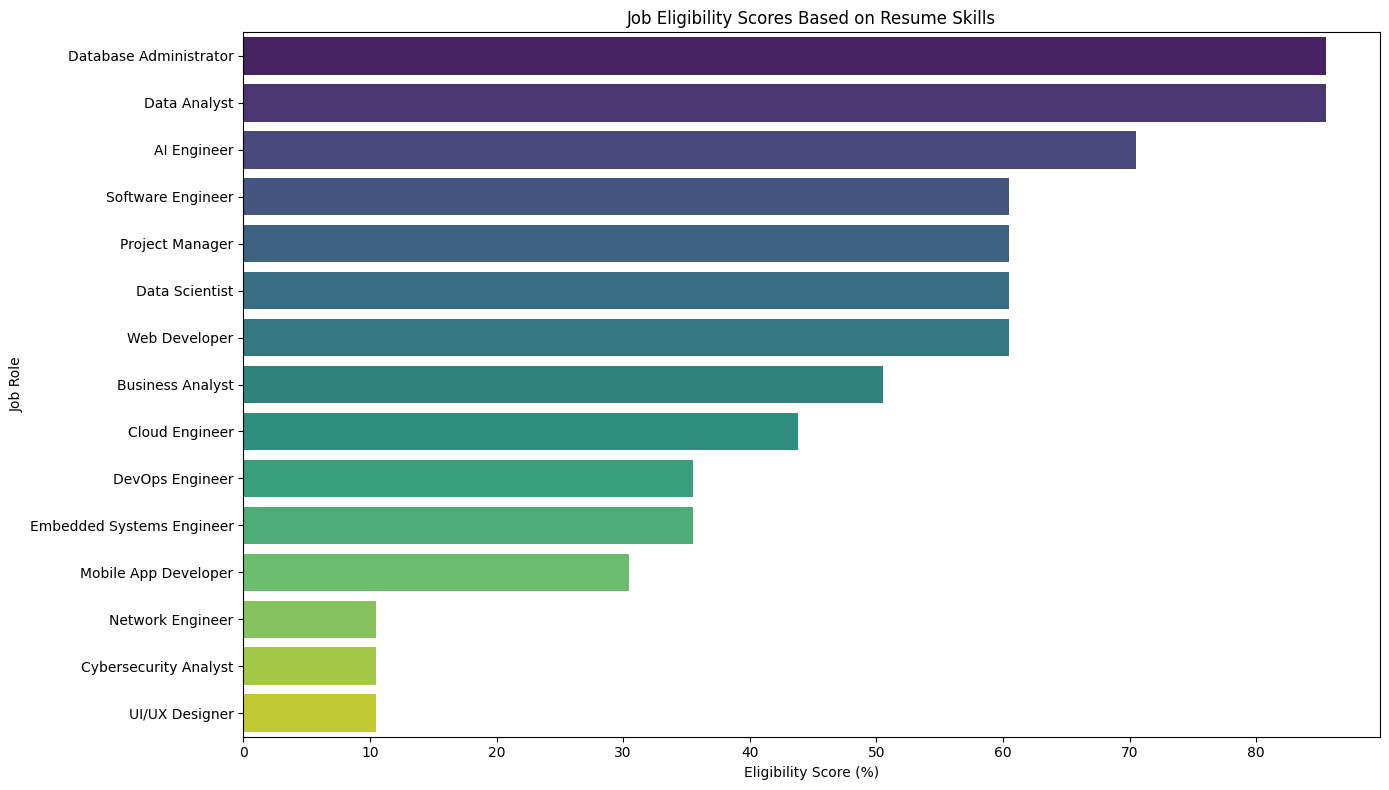

In [12]:
# Visualize Job Eligibility Scores

# Convert the job eligibility dictionary (calculated in the previous cell) to a pandas DataFrame for easier plotting
job_eligibility_df = pd.DataFrame(list(job_eligibility.items()), columns=['Job Role', 'Eligibility Score'])

# Sort the DataFrame by eligibility score in descending order
job_eligibility_df = job_eligibility_df.sort_values(by='Eligibility Score', ascending=False)

# Import necessary libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar chart to visualize the job eligibility scores
plt.figure(figsize=(14, 8)) # Set the size of the plot
# Create a bar plot using seaborn
sns.barplot(x='Eligibility Score', y='Job Role', data=job_eligibility_df, hue='Job Role', palette='viridis', legend=False)
plt.title('Job Eligibility Scores Based on Resume Skills') # Set the title of the plot
plt.xlabel('Eligibility Score (%)') # Set the label for the x-axis
plt.ylabel('Job Role') # Set the label for the y-axis
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show() # Display the plot

In [13]:
# Skill Gap Analysis and Course Suggestions
print("\n--- Skill Gap Analysis and Course Suggestions ---") # Print a header for this section

# Enhanced course suggestions mapping - Maps skills to suggested courses
# This dictionary suggests relevant courses for specific skills
skill_to_course_suggestions = {
    'sql': ['Advanced SQL Course', 'Database Management Certification', 'SQL Performance Tuning'], # Courses for SQL
    'javascript': ['JavaScript Masterclass', 'Modern JavaScript Development', 'React/Node.js Bootcamp'], # Courses for JavaScript
    'python': ['Python for Data Science', 'Advanced Python Programming', 'Python Web Development'], # Courses for Python
    'c++': ['C++ Programming', 'Advanced C++ Concepts', 'C++ for Embedded Systems'], # Courses for C++
    'machine learning': ['Machine Learning Fundamentals', 'Deep Learning Specialization', 'AI Engineering'], # Courses for Machine Learning
    'cloud computing': ['AWS Certification', 'Azure Fundamentals', 'Cloud Architecture'], # Courses for Cloud Computing
    'cybersecurity': ['Cybersecurity Fundamentals', 'Ethical Hacking', 'Security Certification'], # Courses for Cybersecurity
    'communication': ['Effective Communication', 'Public Speaking', 'Business Communication'], # Courses for Communication
    'project management': ['PMP Certification', 'Agile Methodology', 'Project Leadership'], # Courses for Project Management
    'data analysis': ['Data Analysis with Python', 'Data Visualization', 'Statistical Analysis'], # Courses for Data Analysis
    'web development': ['Full-Stack Development', 'Frontend Technologies', 'Web Architecture'], # Courses for Web Development
    'devops': ['DevOps Engineering', 'CI/CD Pipelines', 'Infrastructure as Code'], # Courses for DevOps
    'ui/ux design': ['UI/UX Design Principles', 'User Research Methods', 'Design Tools'], # Courses for UI/UX Design
    'networking': ['Network Fundamentals', 'Cisco Certification', 'Advanced Networking'], # Courses for Networking
    'business analysis': ['Business Analysis', 'Requirements Engineering', 'Process Modeling'], # Courses for Business Analysis
    'java': ['Java Programming', 'Spring Framework', 'Enterprise Java'], # Courses for Java
    'data visualization': ['Tableau/Power BI', 'Data Storytelling', 'Visual Analytics'], # Courses for Data Visualization
}

# Function to analyze skill gap and suggest courses
def analyze_skill_gap_and_suggest_courses(user_skills, job_skills_map, skill_course_map, top_n=3):
    """
    Improved skill gap analysis with better course recommendations
    Analyzes missing skills for each job role based on user's skills and suggests relevant courses.
    Takes user's skills, job skills mapping, and skill-to-course mapping as input.
    Returns a dictionary with skill gap analysis results for each job.
    """
    skill_gap_analysis = {} # Initialize an empty dictionary to store skill gap analysis results

    # Iterate through each job role and its required skills
    for job, required_skills in job_skills_map.items():
        # Identify skills that are required for the job but are NOT in the user's skill set
        missing_skills = [skill for skill in required_skills if skill not in user_skills]

        suggestions = [] # Initialize an empty list to store course suggestions for the current job
        # Suggest courses for each identified missing skill
        for skill in missing_skills: # Iterate through the list of missing skills
            if skill in skill_course_map: # Check if there are course suggestions for the current missing skill
                suggestions.extend(skill_course_map[skill][:2])  # Add the top 2 course suggestions for this skill to the list

        # Remove duplicate course suggestions and limit the total number of suggestions per job
        suggestions = list(dict.fromkeys(suggestions))[:top_n] # Use dict.fromkeys to quickly get unique items and then slice to get top_n

        # Calculate the skill match percentage for this job (redundant with job eligibility, but kept for analysis context)
        if required_skills: # Avoid division by zero if no skills are required
             match_percentage = (len(required_skills) - len(missing_skills)) / len(required_skills) * 100
        else:
             match_percentage = 0.0

        # Store the analysis results for the current job
        skill_gap_analysis[job] = {
            "missing_skills": missing_skills, # List of skills the user is missing for this job
            "suggested_courses": suggestions, # List of suggested courses to fill the gap
            "match_percentage": match_percentage # Percentage of required skills the user has
        }

    return skill_gap_analysis # Return the dictionary containing skill gap analysis for all jobs

# Perform skill gap analysis using the user's extracted skills and the job skills mapping
skill_gaps = analyze_skill_gap_and_suggest_courses(user_resume_skills, job_skills_mapping, skill_to_course_suggestions)

# Print the skill gap analysis results, focusing on jobs with missing skills
print("\n--- Skill Gap Analysis (Missing Skills) ---") # Header
for job, analysis in skill_gaps.items(): # Iterate through the skill gap analysis results for each job
    if analysis["missing_skills"]: # Check if the job has any missing skills
        print(f"\nJob: {job}") # Print the job name
        print(f"  Skills Needed: {', '.join(analysis['missing_skills'])}") # Print the list of missing skills, joined by commas


--- Skill Gap Analysis and Course Suggestions ---

--- Skill Gap Analysis (Missing Skills) ---

Job: Cloud Engineer
  Skills Needed: cloud computing, networking, linux, security

Job: Web Developer
  Skills Needed: html, css, web development

Job: Network Engineer
  Skills Needed: networking, linux, security

Job: Database Administrator
  Skills Needed: security

Job: Cybersecurity Analyst
  Skills Needed: cybersecurity, networking, linux, security

Job: Software Engineer
  Skills Needed: c++, data structures, algorithms

Job: AI Engineer
  Skills Needed: data analysis, pytorch

Job: Embedded Systems Engineer
  Skills Needed: c++, embedded systems, hardware

Job: Business Analyst
  Skills Needed: business analysis, data analysis, project management

Job: Data Analyst
  Skills Needed: data analysis

Job: DevOps Engineer
  Skills Needed: cloud computing, linux, automation

Job: Mobile App Developer
  Skills Needed: kotlin, swift, mobile development, ui/ux design

Job: UI/UX Designer
  S

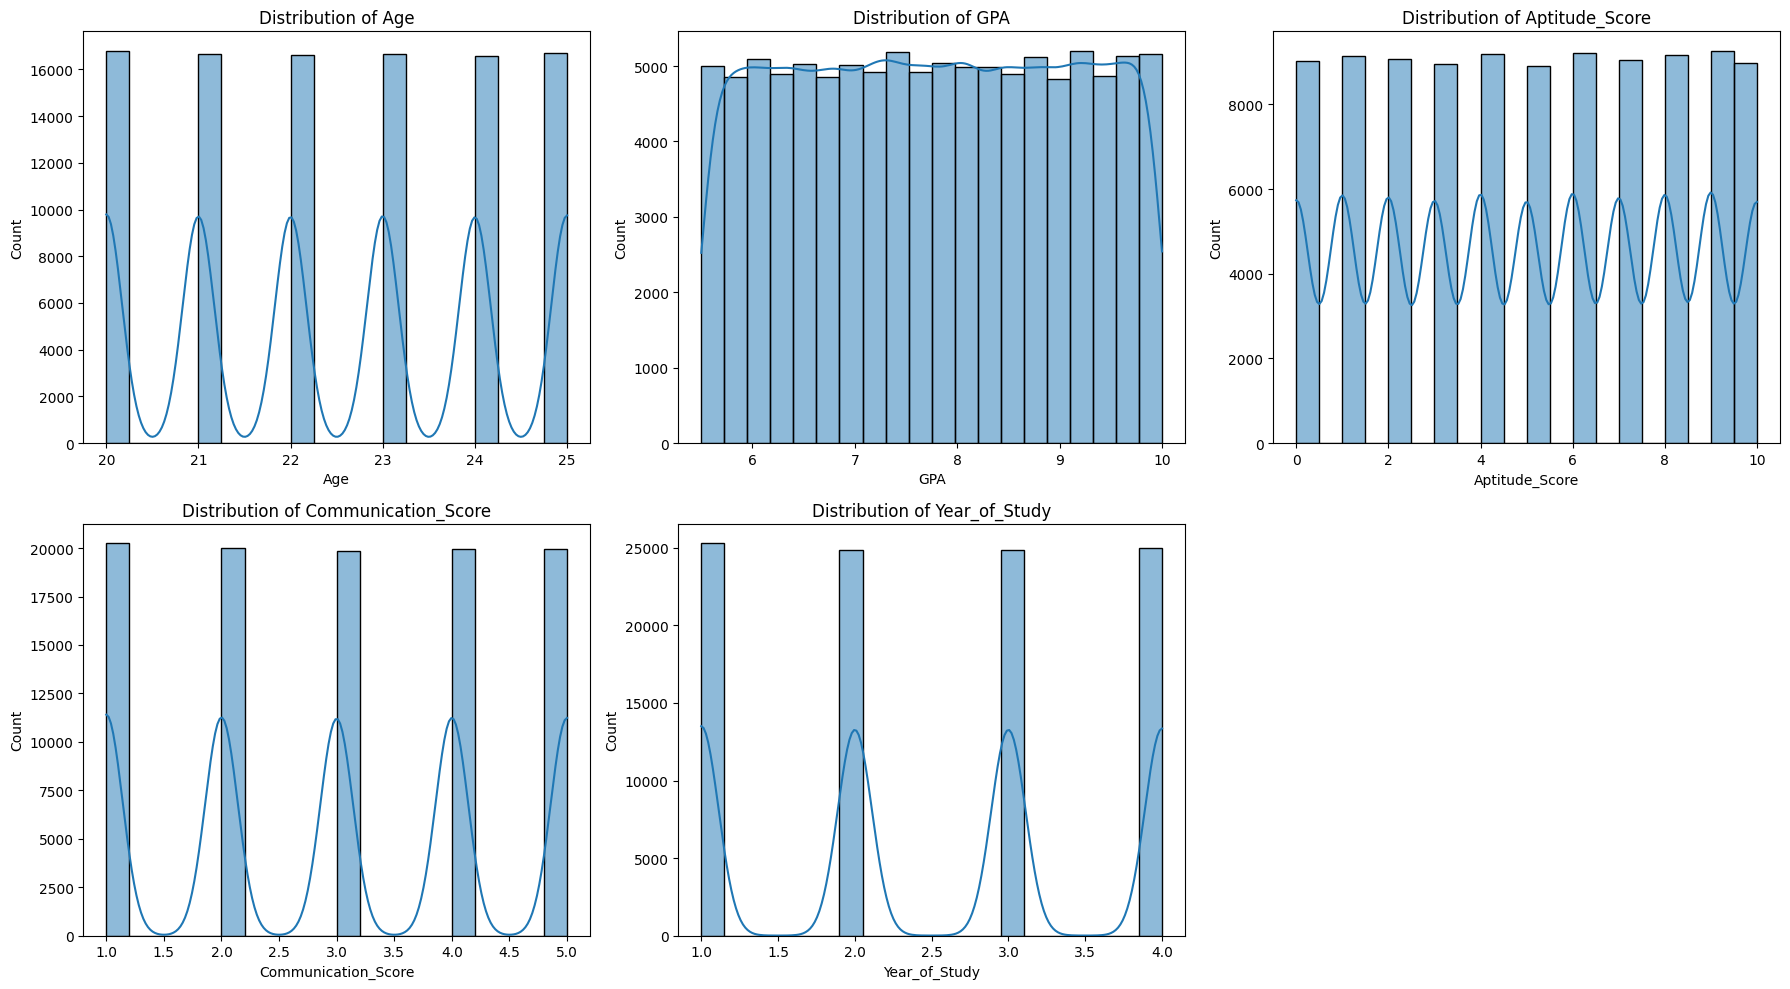

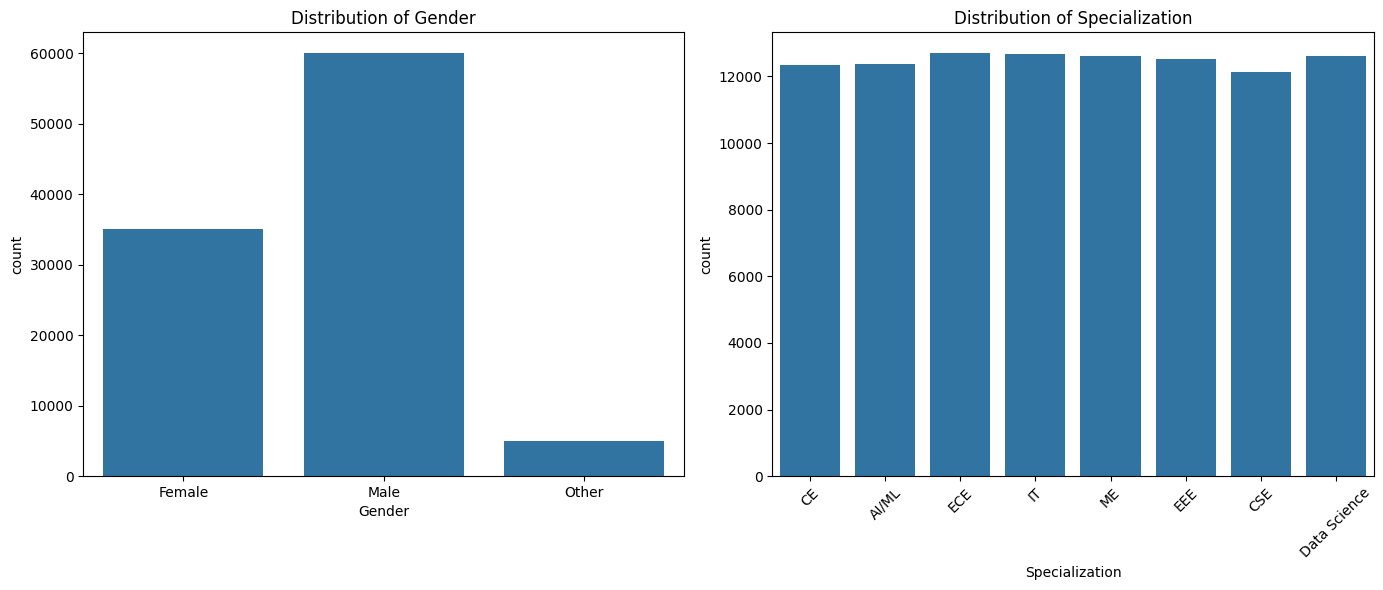

In [14]:
# Visualize Data Distributions

# Define the list of numerical features to visualize
numerical_features = ['Age', 'GPA', 'Aptitude_Score', 'Communication_Score', 'Year_of_Study']
# Create a figure and a set of subplots for the histograms
# nrows=2, ncols=3 creates a 2x3 grid of plots
# figsize sets the size of the figure
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten() # Flatten the 2D array of axes into a 1D array for easier iteration

# Create a histogram for each numerical feature
for i, col in enumerate(numerical_features): # Iterate through the numerical features with their index
    # Create a histogram using seaborn's histplot
    # data=df: specify the DataFrame
    # x=col: specify the column for the x-axis
    # kde=True: overlay a kernel density estimate line
    # bins=20: divide the data into 20 bins
    # ax=axes[i]: specify the subplot to draw on
    sns.histplot(data=df, x=col, kde=True, bins=20, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}') # Set the title for the current subplot

# Remove any unused subplots if the number of features is less than the number of subplots created
for j in range(i + 1, len(axes)): # Iterate through the remaining axes indices
    fig.delaxes(axes[j]) # Delete the unused subplot

plt.tight_layout() # Adjust subplot parameters for a tight layout, preventing titles/labels from overlapping
plt.show() # Display the figure with the histograms

# Create countplots for categorical features

# Define the list of categorical features to visualize
categorical_features = ['Gender', 'Specialization']
# Create a figure and a set of subplots for the countplots
# nrows=1, ncols=2 creates a 1x2 grid of plots
# figsize sets the size of the figure
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
axes = axes.flatten() # Flatten the 2D array of axes into a 1D array for easier iteration

# Create a countplot for each categorical feature
for i, col in enumerate(categorical_features): # Iterate through the categorical features with their index
    # Create a countplot using seaborn's countplot
    # data=df: specify the DataFrame
    # x=col: specify the column for the x-axis
    # ax=axes[i]: specify the subplot to draw on
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}') # Set the title for the current subplot
    if col == 'Specialization': # For the 'Specialization' plot, rotate the x-axis labels
        axes[i].tick_params(axis='x', rotation=45) # Rotate x-axis labels by 45 degrees

plt.tight_layout() # Adjust subplot parameters for a tight layout
plt.show() # Display the figure with the countplots

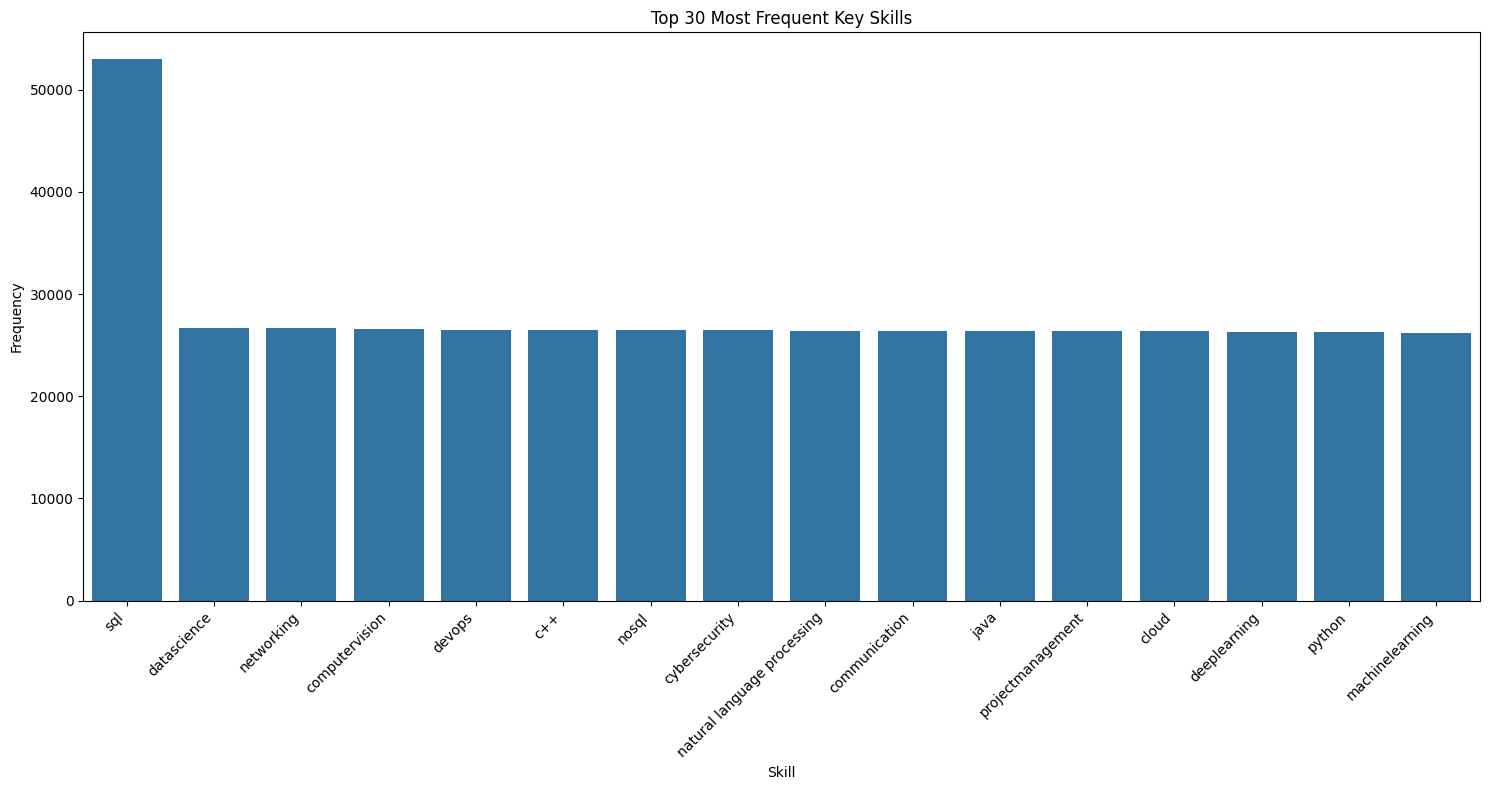

In [15]:
# Visualize Skill Frequencies

# Flatten the list of lists in 'Key_Skills_Processed' to get a single list of all skills
# This list comprehension iterates through each list of skills in the column and collects all individual skills
all_skills = [skill for sublist in df['Key_Skills_Processed'] for skill in sublist]

# Calculate the frequency (count) of each unique skill
skill_counts = pd.Series(all_skills).value_counts() # Create a pandas Series from the list of skills and use value_counts() to count occurrences

# Select the top N most frequent skills for visualization
top_n = 30 # Define the number of top skills to visualize
top_skills = skill_counts.head(top_n) # Get the top N skills and their counts

# Create a bar chart to visualize the top skills and their frequencies
plt.figure(figsize=(15, 8)) # Set the size of the plot
sns.barplot(x=top_skills.index, y=top_skills.values) # Create a bar plot with skill names on the x-axis and counts on the y-axis
plt.title(f'Top {top_n} Most Frequent Key Skills') # Set the title of the plot
plt.xlabel('Skill') # Set the label for the x-axis
plt.ylabel('Frequency') # Set the label for the y-axis
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels by 45 degrees for better readability, aligning to the right
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show() # Display the plot

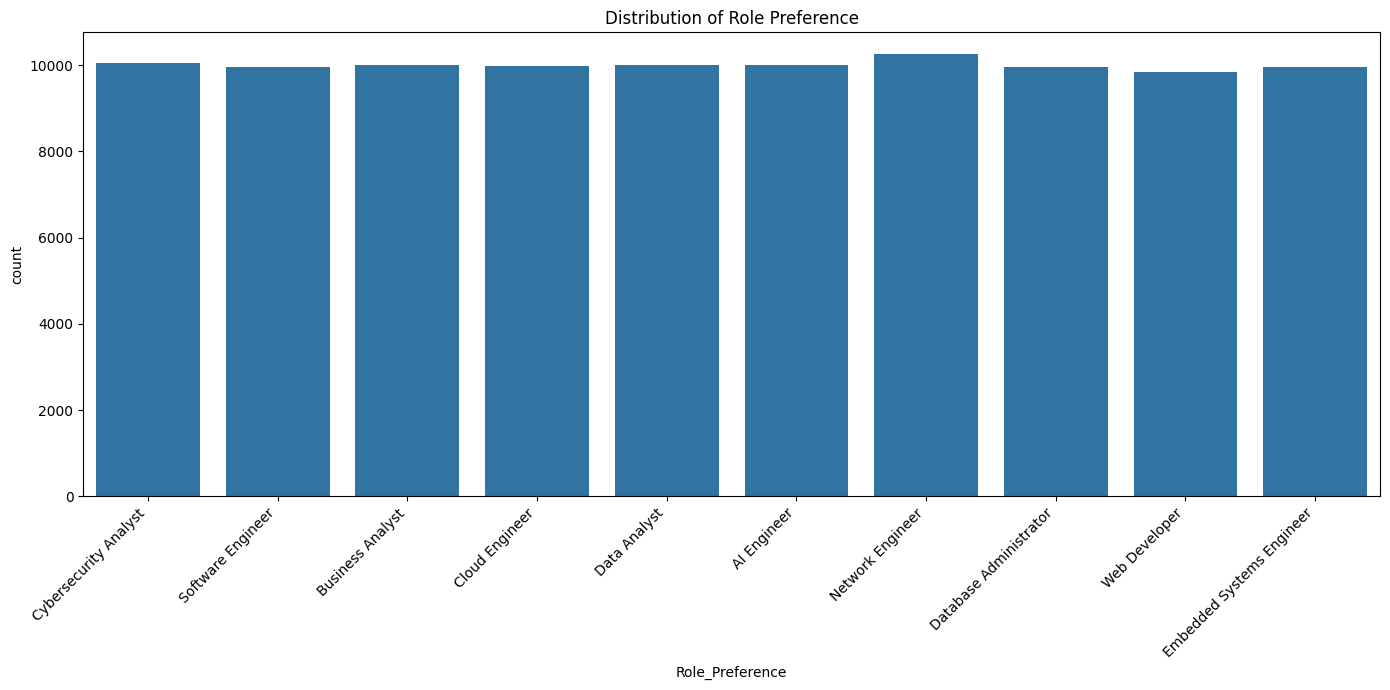

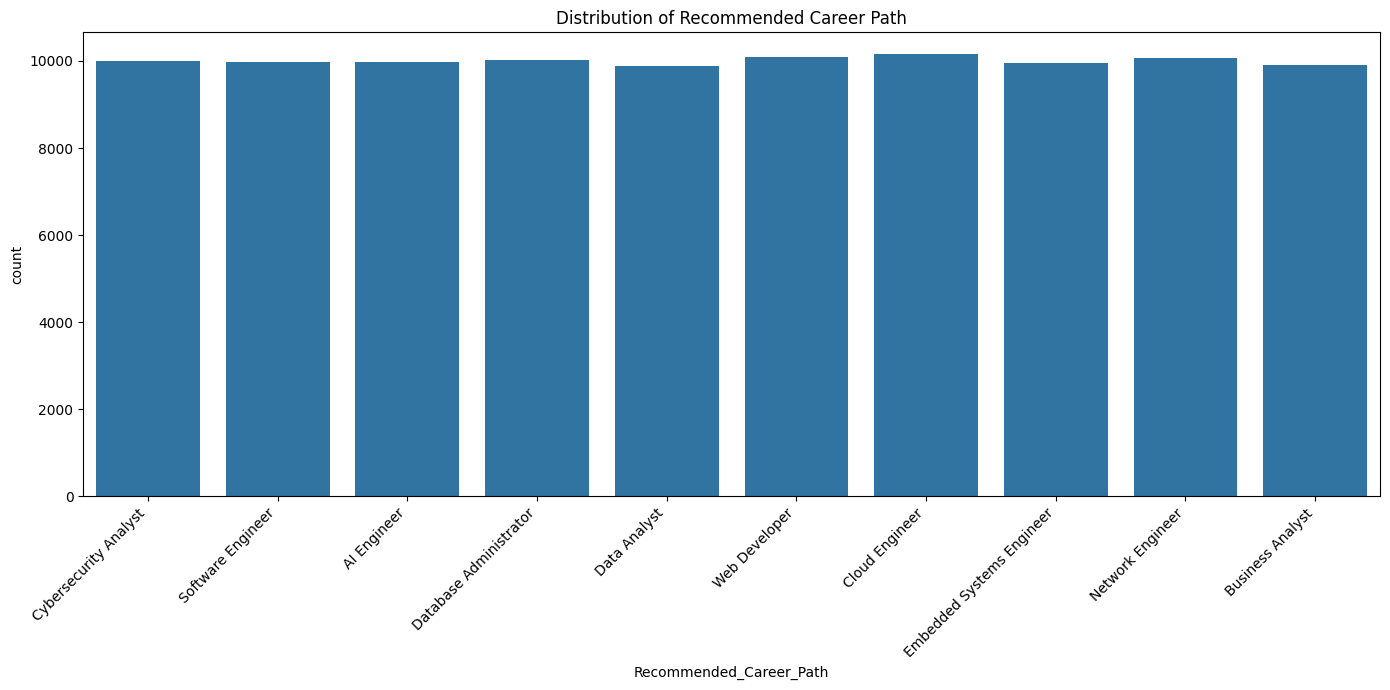

In [16]:
# Visualize Job Role Preferences and Recommended Paths

# Create a countplot for 'Role_Preference' to show the distribution of preferred job roles
plt.figure(figsize=(14, 7)) # Set the size of the plot
sns.countplot(data=df, x='Role_Preference') # Create a countplot showing the frequency of each preferred role
plt.title('Distribution of Role Preference') # Set the title of the plot
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show() # Display the plot

# Create a countplot for 'Recommended_Career_Path' to show the distribution of recommended career paths
plt.figure(figsize=(14, 7)) # Set the size of the plot
sns.countplot(data=df, x='Recommended_Career_Path') # Create a countplot showing the frequency of each recommended path
plt.title('Distribution of Recommended Career Path') # Set the title of the plot
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show() # Display the plot

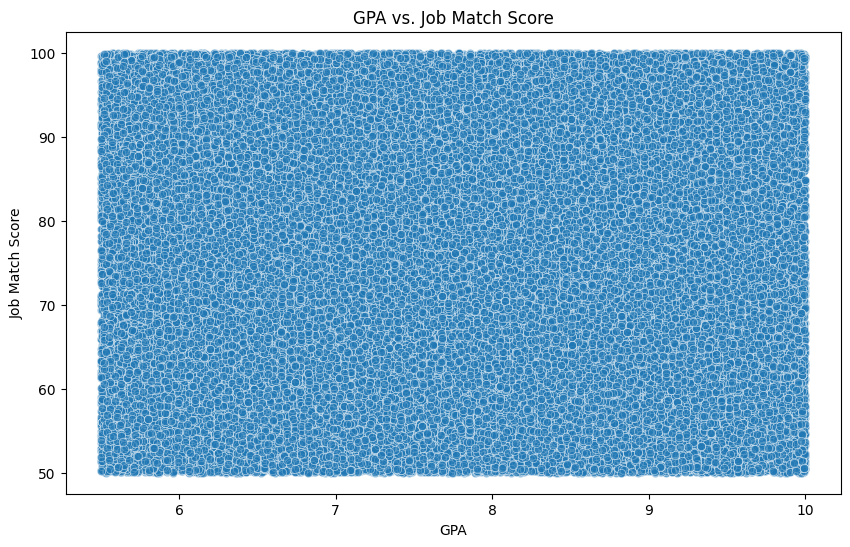

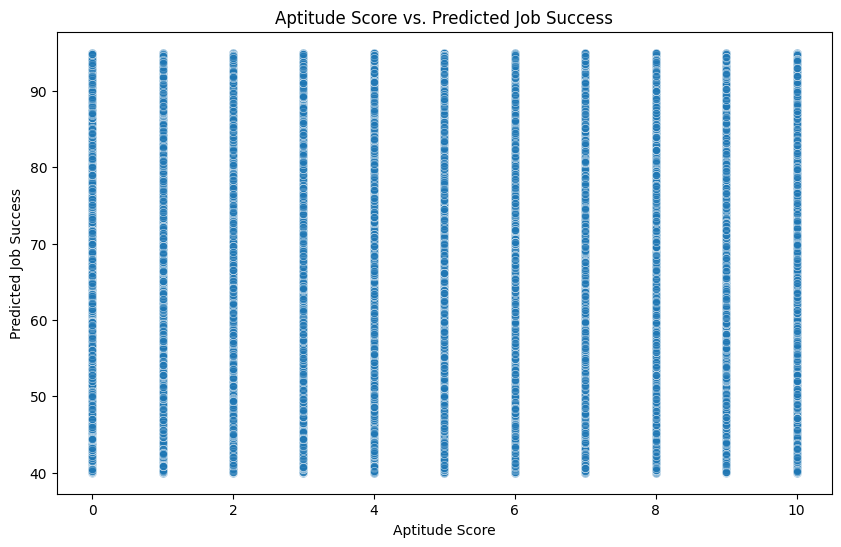

In [18]:
# Visualize Relationships

# Create a scatter plot to visualize the relationship between GPA and Job Match Score
plt.figure(figsize=(10, 6)) # Set the size of the plot
# Create a scatter plot using seaborn's scatterplot
# data=df: specify the DataFrame
# x='GPA': specify the column for the x-axis
# y='Job_Match_Score': specify the column for the y-axis
# alpha=0.6: set transparency to 60% (useful for visualizing overlapping points in large datasets)
sns.scatterplot(data=df, x='GPA', y='Job_Match_Score', alpha=0.6)
plt.title('GPA vs. Job Match Score') # Set the title of the plot
plt.xlabel('GPA') # Set the label for the x-axis
plt.ylabel('Job Match Score') # Set the label for the y-axis
plt.show() # Display the plot

# Create a scatter plot to visualize the relationship between Aptitude Score and Predicted Job Success
plt.figure(figsize=(10, 6)) # Set the size of the plot
# Create a scatter plot using seaborn's scatterplot
# data=df: specify the DataFrame
# x='Aptitude_Score': specify the column for the x-axis
# y='Predicted_Job_Success': specify the column for the y-axis
# alpha=0.6: set transparency
sns.scatterplot(data=df, x='Aptitude_Score', y='Predicted_Job_Success', alpha=0.6)
plt.title('Aptitude Score vs. Predicted Job Success') # Set the title of the plot
plt.xlabel('Aptitude Score') # Set the label for the x-axis
plt.ylabel('Predicted Job Success') # Set the label for the y-axis
plt.show() # Display the plot